AMV Historical Data

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [3]:
df

0       15225.0
1       14865.0
2       14414.0
3       14594.0
4       14144.0
         ...   
1308     3500.0
1309     3500.0
1310     3500.0
1311     3600.0
1312     3700.0
Name: Price, Length: 1313, dtype: float64

In [4]:
# 3. Split train, test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [8]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [9]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [10]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[3007.64661062 2995.66602785 2983.68544507 2971.70486229 2959.72427951
 2947.74369673 2935.76311395 2923.78253118 2911.8019484  2899.82136562
 2887.84078284 2875.86020006 2863.87961728 2851.89903451 2839.91845173
 2827.93786895 2815.95728617 2803.97670339 2791.99612061 2780.01553784
 2768.03495506 2756.05437228 2744.0737895  2732.09320672 2720.11262394
 2708.13204117 2696.15145839 2684.17087561 2672.19029283 2660.20971005]
Predicted closing prices for the next 60 days:
[3007.64661062 2995.66602785 2983.68544507 2971.70486229 2959.72427951
 2947.74369673 2935.76311395 2923.78253118 2911.8019484  2899.82136562
 2887.84078284 2875.86020006 2863.87961728 2851.89903451 2839.91845173
 2827.93786895 2815.95728617 2803.97670339 2791.99612061 2780.01553784
 2768.03495506 2756.05437228 2744.0737895  2732.09320672 2720.11262394
 2708.13204117 2696.15145839 2684.17087561 2672.19029283 2660.20971005
 2648.22912727 2636.2485445  2624.26796172 2612.28737

In [11]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 375.2402136066954
MAPE: 8.243502064519035
MSLE: 0.00933089595155446


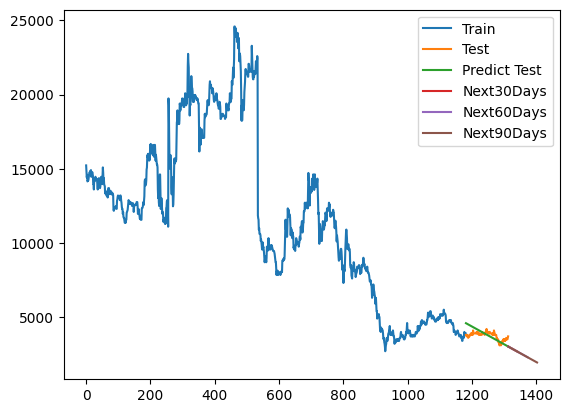

In [12]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DHT Historical Data

In [13]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [14]:
# 2. Load data
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [15]:
df

0       10860.1
1       11224.9
2       11337.1
3       11561.6
4       11589.7
         ...   
1307    38600.0
1308    39300.0
1309    39500.0
1310    39300.0
1311    40400.0
Name: Price, Length: 1312, dtype: float64

In [16]:
# 3. Split train, test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [17]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [19]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [20]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [21]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [22]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[19108.87837312 19113.17167484 19117.46497656 19121.75827828
 19126.05158    19130.34488172 19134.63818344 19138.93148516
 19143.22478687 19147.51808859 19151.81139031 19156.10469203
 19160.39799375 19164.69129547 19168.98459719 19173.2778989
 19177.57120062 19181.86450234 19186.15780406 19190.45110578
 19194.7444075  19199.03770922 19203.33101094 19207.62431265
 19211.91761437 19216.21091609 19220.50421781 19224.79751953
 19229.09082125 19233.38412297]
Predicted closing prices for the next 60 days:
[19108.87837312 19113.17167484 19117.46497656 19121.75827828
 19126.05158    19130.34488172 19134.63818344 19138.93148516
 19143.22478687 19147.51808859 19151.81139031 19156.10469203
 19160.39799375 19164.69129547 19168.98459719 19173.2778989
 19177.57120062 19181.86450234 19186.15780406 19190.45110578
 19194.7444075  19199.03770922 19203.33101094 19207.62431265
 19211.91761437 19216.21091609 19220.50421781 19224.79751953
 19229.09082125 19233.

In [23]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 8788.855475114478
MAPE: 28.076169256432316
MSLE: 0.13160423119238263


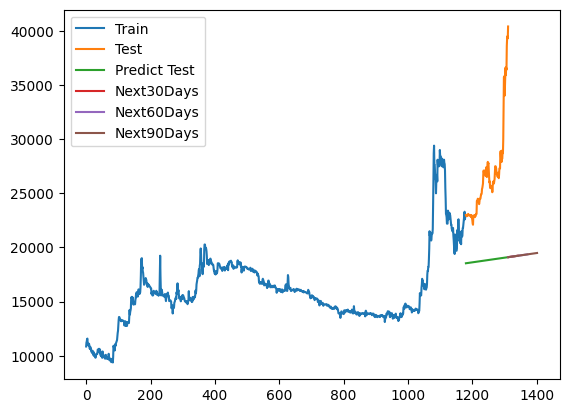

In [24]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DP3 Historical Data

In [25]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [26]:
# 2. Load data
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True) # Reset the index

In [27]:
df

0       73800.0
1       74900.0
2       74400.0
3       74700.0
4       76300.0
         ...   
1132    60900.0
1133    61000.0
1134    61000.0
1135    61500.0
1136    61600.0
Name: Price, Length: 1137, dtype: float64

In [28]:
# 3. Split train, test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [29]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [31]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [32]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [33]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [34]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[60855.76059817 60834.02130805 60812.28201794 60790.54272783
 60768.80343772 60747.06414761 60725.3248575  60703.58556739
 60681.84627728 60660.10698717 60638.36769706 60616.62840695
 60594.88911684 60573.14982673 60551.41053662 60529.67124651
 60507.9319564  60486.19266629 60464.45337618 60442.71408607
 60420.97479596 60399.23550585 60377.49621574 60355.75692563
 60334.01763552 60312.27834541 60290.5390553  60268.79976519
 60247.06047508 60225.32118497]
Predicted closing prices for the next 60 days:
[60855.76059817 60834.02130805 60812.28201794 60790.54272783
 60768.80343772 60747.06414761 60725.3248575  60703.58556739
 60681.84627728 60660.10698717 60638.36769706 60616.62840695
 60594.88911684 60573.14982673 60551.41053662 60529.67124651
 60507.9319564  60486.19266629 60464.45337618 60442.71408607
 60420.97479596 60399.23550585 60377.49621574 60355.75692563
 60334.01763552 60312.27834541 60290.5390553  60268.79976519
 60247.06047508 6022

In [35]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 5932.824108381621
MAPE: 7.297039767029394
MSLE: 0.008139034150688843


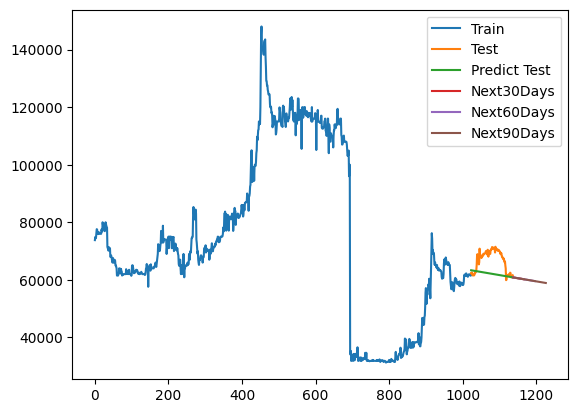

In [36]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()